# Глава.6 Исследовательский анализ данных и машинное обучение

6.1 Классификация

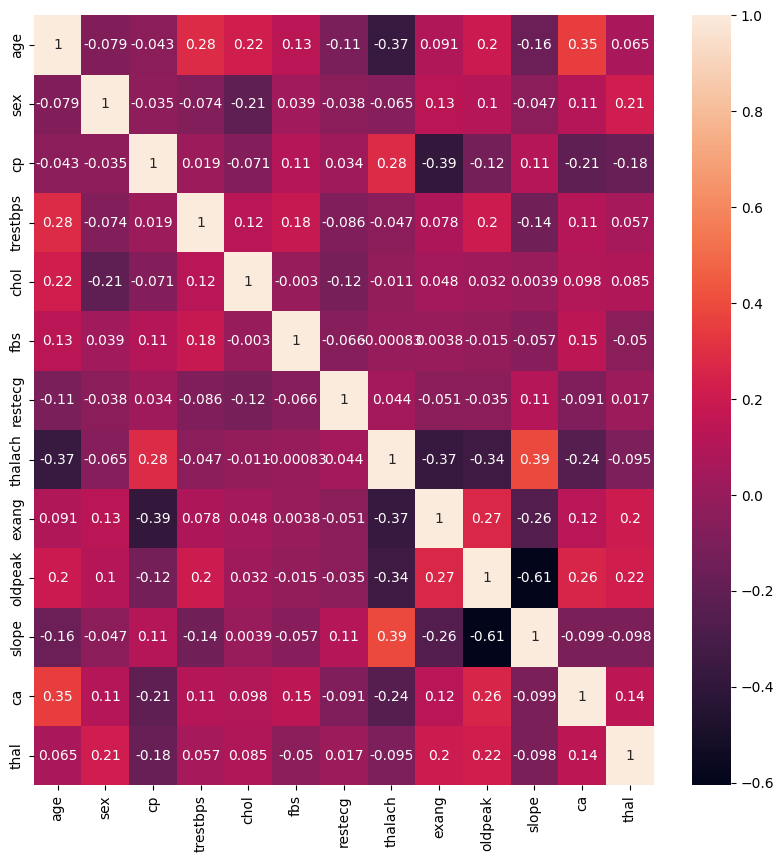

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     67    1   0       160   286    0        0      108      1      1.5   
1     67    1   0       120   229    0        0      129      1      2.6   
2     62    0   0       140   268    0        0      160      0      3.6   
3     63    1   0       130   254    0        0      147      0      1.4   
4     53    1   0       140   203    1        0      155      1      3.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
271   41    1   1       110   235    0        1      153      0      0.0   
272   41    0   1       126   306    0        1      163      0      0.0   
273   49    0   0       130   269    0        1      163      0      0.0   
274   60    0   2       120   178    1        1       96      0      0.0   
275   62    1   1       128   208    1        0      140      0      0.0   

     slope  ca  thal  target  
0        1   3     2       0  
1        1   2     3     

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import compress
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split 



df = pd.read_csv('heart.csv')

df1 = df[df['target']==0].head(138)
df2 = df[df['target']==1].head(138)
df = pd.concat([df1, df2], ignore_index=True)

plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df.drop(['target'], axis=1).corr(), annot=True)             #Коэффициенты корреляции на тепловой карте
plt.show()

print(df)
print(df['target'].value_counts())

In [16]:
from sklearn.model_selection import train_test_split   
from sklearn.neighbors import KNeighborsClassifier

X = df[['slope', 'thalach']]                                #Оценка хи-квадрат
y = df['target']

# Разбиение данных на два подмножества: для обучения и тестирования (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=None, stratify=y)            


# STEP1 - создание экземпляра модели (Instantiating the Model)
# Кол-во соседних значений n = 5
knn = KNeighborsClassifier(n_neighbors=5)

# STEP2 - подгонка модели (Fitting the Model)
knn.fit(X_train, y_train)

# STEP3 - проверка модели на одном тестовом значении (Prediction)
import numpy as np
new_data = np.array([2, 108])
new_data = new_data.reshape(1, -1)
print('STEP3', knn.predict(new_data))
# STEP4 - проверка модели на множестве тестовых значений (Prediction)
pred_X_test = knn.predict(X_test)
print('STEP4', pred_X_test)

# STEP5 - вероятностное предсказание (Probability Prediction)
y_pred_prob = knn.predict_proba(X_test)
print('STEP5', y_pred_prob[10:12])

# STEP6 - проверка точности модели
print('STEP6', knn.score(X_test, y_test))

# STEP7 - построение матрицы неточностей и метрик precision, recall, F-мера
y_pred = knn.predict(X_test)


from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))

STEP3 [0]
STEP4 [0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0
 0 0 1 0 1 1 1 0 0]
STEP5 [[0.4 0.6]
 [0.6 0.4]]
STEP6 0.6024096385542169
              precision    recall  f1-score   support

           0       0.58      0.71      0.64        41
           1       0.64      0.50      0.56        42

    accuracy                           0.60        83
   macro avg       0.61      0.60      0.60        83
weighted avg       0.61      0.60      0.60        83

[[29 12]
 [21 21]]


c:\Users\zhabs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [24]:
# STEP8 - перекрёстная проверка (K-fold Cross Validation)
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)
# 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
# print each cv score (accuracy)
print(cv_scores)
print('Среднее значение по точности:', cv_scores.mean())
print('Или реднее значение по точности в %:', 100*cv_scores.mean())

# STEP9 - перекрёстная проверка (K-fold Cross Validation с GridSearchCV)
from sklearn.model_selection import GridSearchCV
# Создание нового экземпляра модели (Instantiating the Model)
knn2 = KNeighborsClassifier()
# Создание словаря с разными параметрами соседних значений
param_grid = {'n_neighbors': np.arange(2, 10)}
# Анализ всех n_neighbors при 5-кратной перекрёстной проверке
# Обычно используют 5-ти или 10-кратную перекрёстную проверку
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
# Подгонка модели и вывод лучшего n_neighbors
knn_gscv.fit(X, y)
print('Оптимальное значение k-ближайших соседей:',knn_gscv.best_params_)

[0.64285714 0.63636364 0.69090909 0.67272727 0.67272727]
Среднее значение по точности: 0.6631168831168831
Или реднее значение по точности в %: 66.31168831168831
Оптимальное значение k-ближайших соседей: {'n_neighbors': 2}
